# Pandas Tutorial
Tutorial from: https://github.com/TwistedHardware/mltutorial/blob/master/notebooks/IPython-Tutorial/7%20-%20Pandas.ipynb

Pandas is powerful and easy-to-use library for data analysis. Is has two main object to represents data: Series and DataFrame.

Finding Help:

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- http://pandas.pydata.org/pandas-docs/stable/tutorials.html

# Import libraries

In [1]:
import numpy as np
import pandas as pd

# Working with Series

Series is an array like object.

#### pd.Series(self, data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)

In [2]:
x = pd.Series([1,2,3,4,5])
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

Notice that generated an index for your item

## Basic Operation

In [3]:
x + 100

0    101
1    102
2    103
3    104
4    105
dtype: int64

In [4]:
(x ** 2) + 100

0    101
1    104
2    109
3    116
4    125
dtype: int64

In [5]:
x > 2

0    False
1    False
2     True
3     True
4     True
dtype: bool

## `any()` and `all()`

In [6]:
larger_than_2 = x > 2
larger_than_2

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [7]:
larger_than_2.any()

True

In [8]:
larger_than_2.all()

False

## `apply()`

In [9]:
def f(x):
    if x % 2 == 0:
        return x * 2
    else:
        return x * 3

x.apply(f)

0     3
1     4
2     9
3     8
4    15
dtype: int64

**Avoid looping over your data**

This is a `%%timeit` results from `apply()` and a for loop.

In [10]:
%%timeit

ds = pd.Series(range(10000))

for counter in range(len(ds)):
    ds[counter] = f(ds[counter])

141 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit

ds = pd.Series(range(10000))

ds = ds.apply(f)

3.43 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## `astype()`

In [12]:
x.astype(np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

## `describe()`

In [13]:
x.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

# DataFrame

#### pd.DataFrame(self, data=None, index=None, columns=None, dtype=None, copy=False)

In [14]:
# This creates a DataFrame with a single column. Each column is a pandas Series.
data = [1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(data, columns=["x"])

In [15]:
df

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


## Selecting Data

In [16]:
df["x"] # select column 'x'

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: x, dtype: int64

In [17]:
df["x"][0] # Select the first item from the column 'x'

1

## Adding extra columns

In [18]:
# 'x_plus_2' is not yet a column in df. This creates it new.
df["x_plus_2"] = df["x"] + 2
df

,x,x_plus_2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8
6,7,9
7,8,10
8,9,11


In [19]:
df["x_square"] = df["x"] ** 2
df["x_factorial"] = df["x"].apply(np.math.factorial)
df

,x,x_plus_2,x_square,x_factorial
0,1,3,1,1
1,2,4,4,2
2,3,5,9,6
3,4,6,16,24
4,5,7,25,120
5,6,8,36,720
6,7,9,49,5040
7,8,10,64,40320
8,9,11,81,362880


In [20]:
df["is_even"] = df["x"] % 2
df

,x,x_plus_2,x_square,x_factorial,is_even
0,1,3,1,1,1
1,2,4,4,2,0
2,3,5,9,6,1
3,4,6,16,24,0
4,5,7,25,120,1
5,6,8,36,720,0
6,7,9,49,5040,1
7,8,10,64,40320,0
8,9,11,81,362880,1


### `map()`

In [21]:
df["odd_even"] = df["is_even"].map({1:"odd", 0:"even"})
df

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
0,1,3,1,1,1,odd
1,2,4,4,2,0,even
2,3,5,9,6,1,odd
3,4,6,16,24,0,even
4,5,7,25,120,1,odd
5,6,8,36,720,0,even
6,7,9,49,5040,1,odd
7,8,10,64,40320,0,even
8,9,11,81,362880,1,odd


### `drop()`

In [22]:
# You MUST include axis=1, axis 0 is the default, and refers to rows.
df.drop("is_even", axis=1) 

,x,x_plus_2,x_square,x_factorial,odd_even
0,1,3,1,1,odd
1,2,4,4,2,even
2,3,5,9,6,odd
3,4,6,16,24,even
4,5,7,25,120,odd
5,6,8,36,720,even
6,7,9,49,5040,odd
7,8,10,64,40320,even
8,9,11,81,362880,odd


In [23]:
# Drop multiple columns
df.drop(["is_even", "x"], axis=1)

,x_plus_2,x_square,x_factorial,odd_even
0,3,1,1,odd
1,4,4,2,even
2,5,9,6,odd
3,6,16,24,even
4,7,25,120,odd
5,8,36,720,even
6,9,49,5040,odd
7,10,64,40320,even
8,11,81,362880,odd


## Select multiple columns

In [24]:
df[["x", "odd_even"]]

,x,odd_even
0,1,odd
1,2,even
2,3,odd
3,4,even
4,5,odd
5,6,even
6,7,odd
7,8,even
8,9,odd


## Filtering

In [25]:
df[df["odd_even"] == "odd"]

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
0,1,3,1,1,1,odd
2,3,5,9,6,1,odd
4,5,7,25,120,1,odd
6,7,9,49,5040,1,odd
8,9,11,81,362880,1,odd


In [26]:
# You can also select a single column using dot notation.
df[df.odd_even == "even"]

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
1,2,4,4,2,0,even
3,4,6,16,24,0,even
5,6,8,36,720,0,even
7,8,10,64,40320,0,even


### Multiple Filters

#### `|` OR

In [27]:
df[(df.odd_even == "even") | (df.x_square < 20)]

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
0,1,3,1,1,1,odd
1,2,4,4,2,0,even
2,3,5,9,6,1,odd
3,4,6,16,24,0,even
5,6,8,36,720,0,even
7,8,10,64,40320,0,even


#### `&` AND

In [28]:
df[(df.odd_even == "even") & (df.x_square < 20)]

,x,x_plus_2,x_square,x_factorial,is_even,odd_even
1,2,4,4,2,0,even
3,4,6,16,24,0,even


## Plotting
`plot()` will plot all numerical columns on a single plot

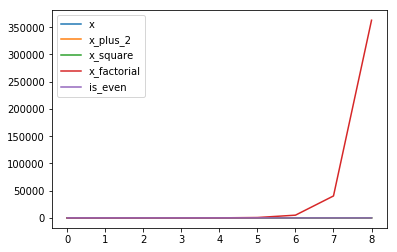

In [29]:
%matplotlib inline
df.plot()

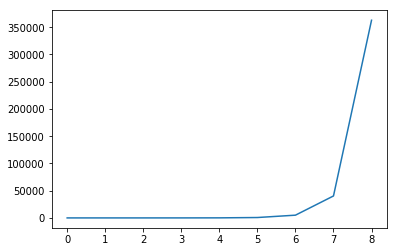

In [30]:
# You can also plot a single column (which is saved as a series internally)
df.x_factorial.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1139efcf8>,
      dtype=object)

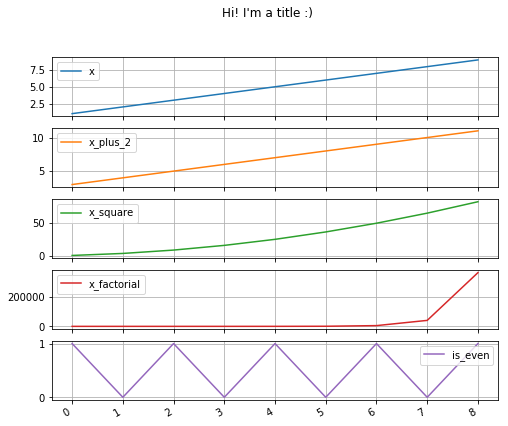

In [31]:
# Subplots, title, custom size, grid
df.plot(subplots=True, title="Hi! I'm a title :)", figsize=(8,7), grid=True)

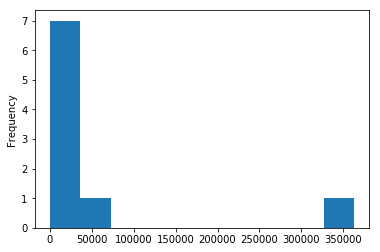

In [32]:
# histogram
df.x_factorial.plot(kind='hist')

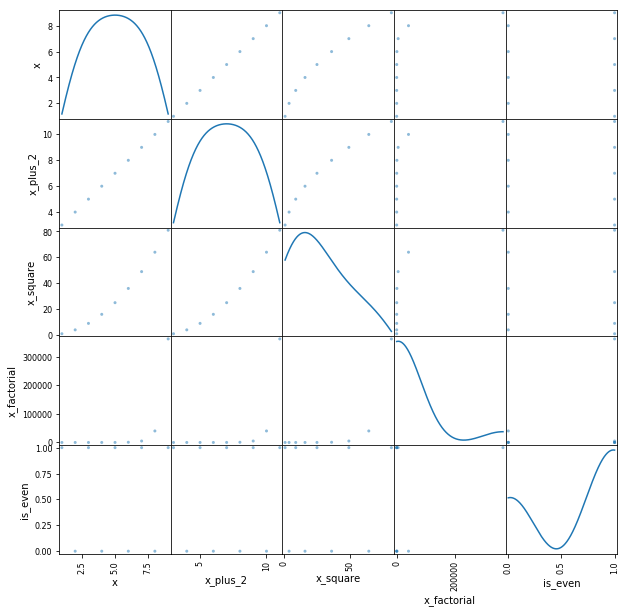

In [33]:
# Pandax scatter matrix
pd.plotting.scatter_matrix(df, diagonal="kde", figsize=(10,10));